In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from scipy.stats import gaussian_kde

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

ftype = '.pdf'

In [6]:
df = pd.read_csv('blog_data_2019.csv', header=None, names=['title', 'num','date'])


In [32]:
print(len(df), sum(df['num']))

226 1650691


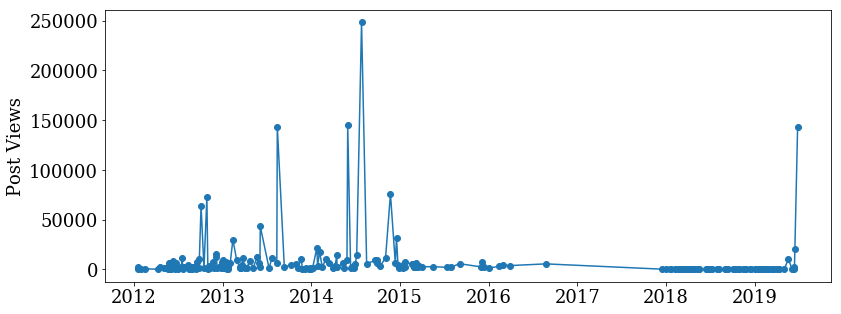

In [56]:
plt.figure(figsize=(13,5))
plt.plot(pd.to_datetime(df['date']), df['num'], '-o')
plt.ylabel('Post Views')
plt.savefig('views.png',dpi=100, bbox_inches='tight', pad_inches=0.25)

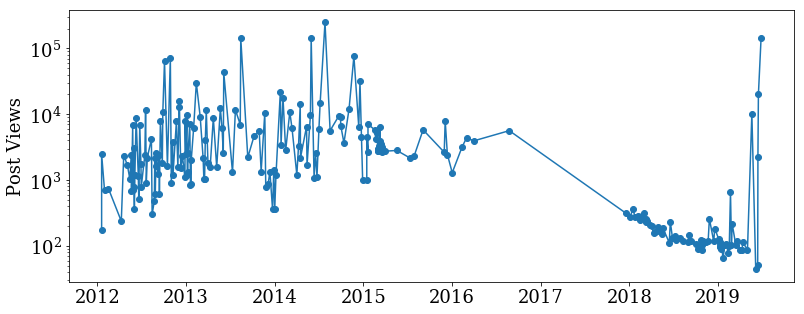

In [57]:
plt.figure(figsize=(13,5))
plt.plot(pd.to_datetime(df['date']), df['num'], '-o')
plt.ylabel('Post Views')
plt.yscale('log')
plt.savefig('views_log.png',dpi=100, bbox_inches='tight', pad_inches=0.25)


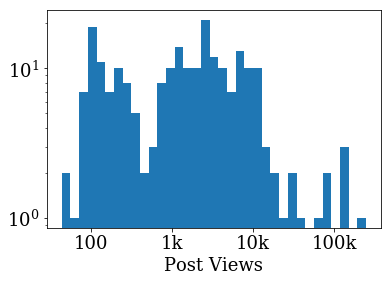

In [58]:
_ = plt.hist(np.log10(df['num']), bins=35)
# plt.xscale('log')
plt.yscale('log')
plt.xticks(ticks=[2,3,4,5],labels=['100', '1k', '10k', '100k']);
plt.xlabel('Post Views')
plt.savefig('views_hist.png',dpi=100, bbox_inches='tight', pad_inches=0.25)

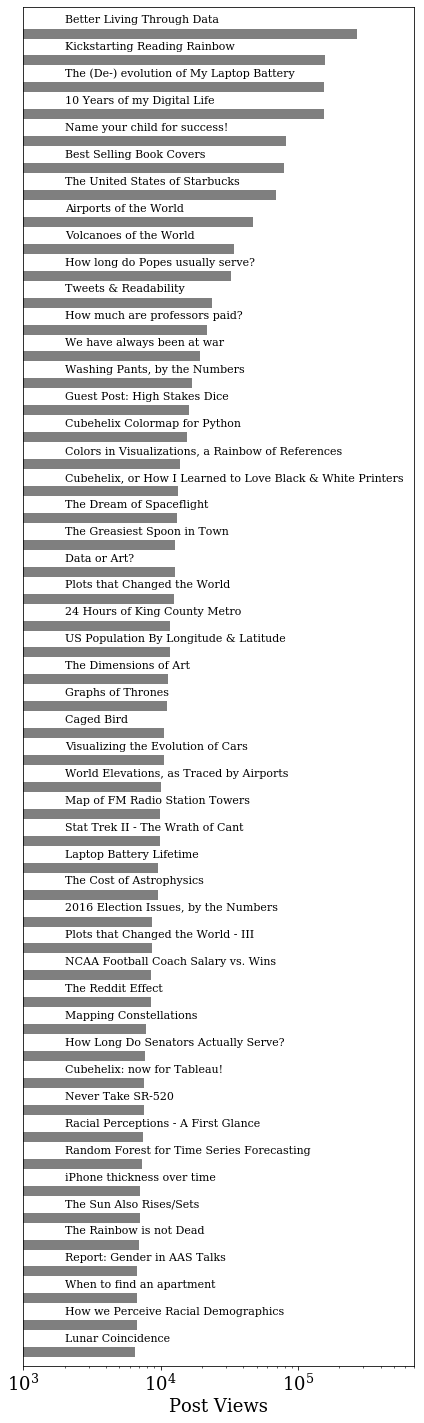

In [59]:
N = 50

ss = np.argsort(df['num'])[::-1]
if N < len(ss):
    ss = ss[0:N]
    
plt.figure(figsize=(7,25))
for k in range(len(ss)):
    plt.plot([0, df['num'].values[ss][k]], [-k,-k],alpha=0.5, lw=10, c='k')
    plt.text(2e3, -k+0.4, df['title'].values[ss][k], fontsize=11)
plt.xscale('log')
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel('Post Views')
plt.xlim(1e3,7e5)
plt.ylim(-49.5,1)
plt.savefig('views_list.png',dpi=100, bbox_inches='tight', pad_inches=0.25)